## Demo of changing face, moving head on Misty robot via rerobots API

This is free software, released under the Apache License, Version 2.0.
You may obtain a copy of the License at https://www.apache.org/licenses/LICENSE-2.0

To learn more about our services, go to https://help.rerobots.net/

Copyright (c) 2018 rerobots, Inc.

In [1]:
API_TOKEN = ''  # GET YOUR TOKEN FROM https://rerobots.net/tokens

In [ ]:
!pip install rerobots

In [3]:
from io import BytesIO
import time
import matplotlib.pyplot as plt
%matplotlib inline
from rerobots.api import APIClient


apic = APIClient(api_token=API_TOKEN)

In [4]:
candidates = apic.get_deployments(types=['fixed_misty1devel'])
instance = apic.request_instance(candidates[0], reserve=False)

In [5]:
## Wait for instance to finish initializing

while True:
    instance_details = apic.get_instance_info(instance['id'])
    if instance_details['status'] == 'READY':
        break
    time.sleep(2)

In [6]:
instance_details

{'deployment': 'f9a4e96f-a8f3-4b25-ae14-5ebdff63f8af',
 'fwd': {'ipv4': '147.75.69.207', 'port': 2210},
 'hostkeys': ['ecdsa-sha2-nistp256 AAAAE2VjZHNhLXNoYTItbmlzdHAyNTYAAAAIbmlzdHAyNTYAAABBBMWqGbR5J5jySPrK3ievwN4OHh4cxVXqOLKaS/HGYYo82gZjM9CFNbH28wVdO20Xlol3zNfA9sWRKR8m98+yVf0= root@rrc'],
 'id': 'f82ea728-3baf-454f-84fb-eef520f1ce1c',
 'region': 'us:cali',
 'rootuser': 'scott',
 'starttime': '2018-11-03 23:44:47.517498',
 'status': 'READY',
 'type': 'fixed_misty1devel'}

In [7]:
## Start the "cam" add-on, which supports video streaming

while True:
    payload = apic.status_addon_cam(instance['id'])
    if payload['status'] == 'active':
        break
    elif payload['status'] == 'notfound':
        apic.activate_addon_cam(instance['id'])
    time.sleep(2)

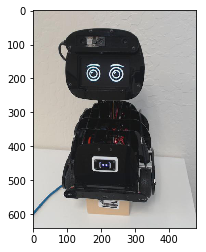

In [8]:
## Display the Misty I Developers' Edition robot as it is now

payload = apic.get_snapshot_cam(instance['id'])

if not payload['success']:
    time.sleep(1)
    payload = apic.get_snapshot_cam(instance['id'])
    assert payload['success']

img = BytesIO()
img.write(payload['data'])
img.seek(0)

img_array = plt.imread(img, format='JPEG')
plt.imshow(img_array)

In [9]:
# Done!

apic.terminate_instance(instance['id'])